# Plots of the results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import re


In [2]:
project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


# Manual import of results 

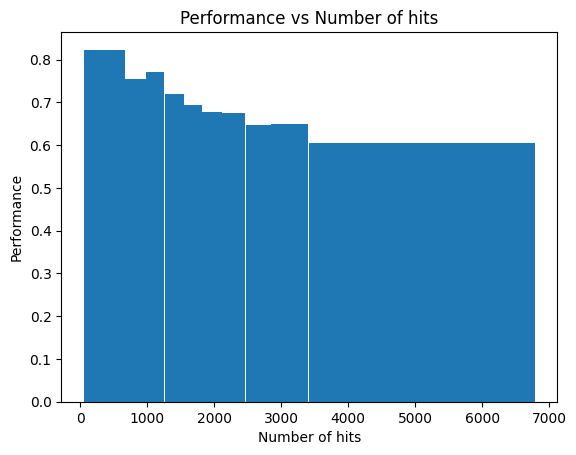

In [3]:

# Define the data for the subsets of events
bounds = [(51, 663), (664, 978), (980, 1255), (1257, 1549), (1550, 1812), (1819, 2119), (2121, 2464), (2468, 2853), (2854, 3405), (3412, 6786)]
lower_bounds = [b[0] for b in bounds]
upper_bounds = [b[1] for b in bounds]

# a list of performance scores for each subset
performance = [0.823, 0.754, 0.772, 0.719,0.694, 0.678, 0.674, 0.647, 0.65, 0.606] 

# Calculate the width of each bar
widths = [upper_bounds[i] - lower_bounds[i] for i in range(len(lower_bounds))]

# Create a bar chart
plt.bar(lower_bounds, performance, width=widths, align='edge')

# Add axis labels and title
plt.xlabel('Number of hits')
plt.ylabel('Performance')
plt.title('Performance vs Number of hits')

# Display the chart
plt.show()


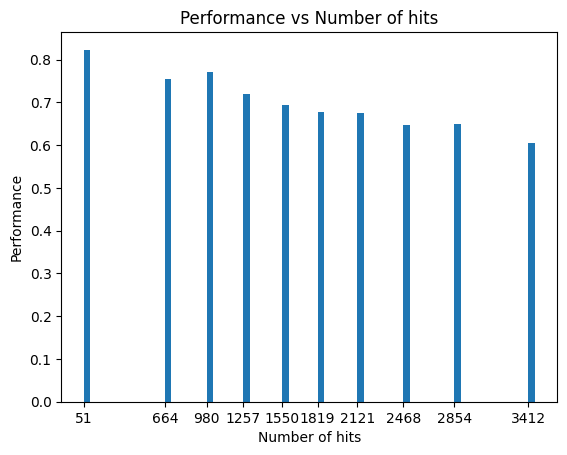

In [4]:
import matplotlib.pyplot as plt

# Define the data for the subsets of events
bounds = [(51, 663), (664, 978), (980, 1255), (1257, 1549), (1550, 1812), (1819, 2119), (2121, 2464), (2468, 2853), (2854, 3405), (3412, 6786)]
lower_bounds = [b[0] for b in bounds]
performance = [0.823, 0.754, 0.772, 0.719,0.694, 0.678, 0.674, 0.647, 0.65, 0.606] 

# Set a fixed width for all bars
width = 50

# Calculate the x positions of the bars
x_pos = [lower_bounds[i] + width/2 for i in range(len(lower_bounds))]

# Create a bar chart
plt.bar(x_pos, performance, width=width, align='center')

# Set the x-axis ticks to be the lower bounds of each subset
plt.xticks(lower_bounds)

# Add axis labels and title
plt.xlabel('Number of hits')
plt.ylabel('Performance')
plt.title('Performance vs Number of hits')

# Display the chart
plt.show()


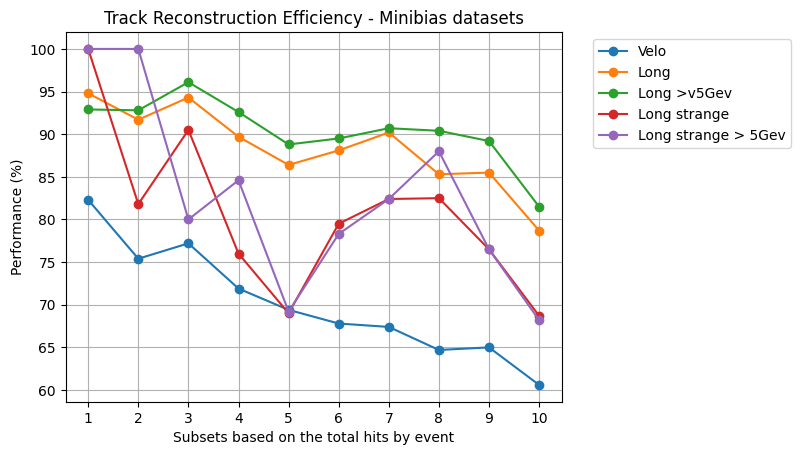

In [5]:

# Data
x = ['1','2','3','4','5','6','7','8','9','10']
velo = [82.3, 75.4, 77.2, 71.9, 69.4, 67.8, 67.4, 64.7, 65, 60.6]  
long = [94.8, 91.7, 94.3, 89.7, 86.4, 88.1, 90.2, 85.3, 85.5, 78.7] 
long_5Gev = [92.9, 92.8, 96.1, 92.6, 88.8, 89.5, 90.7, 90.4, 89.2, 81.5]
long_strange = [100, 81.8, 90.5, 76, 69, 79.5, 82.4, 82.5, 76.5, 68.7]
long_strange_5GeV = [100, 100, 80, 84.6, 69.2, 78.3, 82.4, 88, 76.5, 68.2]

# create a figure object
fig, ax = plt.subplots()

# plot points for performance variable 1
ax.plot(x, velo, marker='o', linestyle='-', label="Velo")

ax.plot(x, long, marker='o', linestyle='-', label="Long")

ax.plot(x, long_5Gev, marker='o', linestyle='-', label="Long >v5Gev")

ax.plot(x, long_strange, marker='o', linestyle='-', label="Long strange")

ax.plot(x, long_strange_5GeV, marker='o', linestyle='-', label="Long strange > 5Gev")


# add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# set axis labels and title
ax.set_xlabel('Subsets based on the total hits by event')
ax.set_ylabel('Performance (%)')
ax.set_title('Track Reconstruction Efficiency - Minibias datasets')

# show plot
plt.grid(True)
plt.show()


# Test automatic performances importation (focus reconstruction efficiency)

## 1. First try where we used the nummber of tracks instead of the calculated percentage

Extract all metrics linked to 'velo'

In [6]:
# Get file path
exp_name = 'results_minibias_samples_hits'
file_path = project_root + "/results/" + exp_name + ".txt"

metrics = {}
with open(file_path, 'r') as f:
    for line in f:
        if 'velo' in line:
            line = line.strip()
            velo_metrics = line.split(':')[1].strip().split()
            metrics['velo'] = float(velo_metrics[0].strip('%,'))
            metrics['velo_clones'] = float(velo_metrics[2].strip('%,'))
            metrics['velo_purity'] = float(velo_metrics[4].strip('%,'))
            metrics['velo_hitEff'] = float(velo_metrics[6].strip('%,'))
print(metrics)

{'velo': 3273.0, 'velo_clones': 5404.0, 'velo_purity': 60.6, 'velo_hitEff': 478.0}


Extract metrics link to the reconstruction efficiency (NB: they are recalculated from the number of tracks found/existing)

In [7]:
import re

with open(file_path, 'r') as f:
    text = f.read()

# Define regular expressions to extract percentages
patterns = {
    'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
    'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
    'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
}

results = {}
for name, pattern in patterns.items():
    match = re.search(pattern, text)
    if match:
        numerator, denominator = match.groups()
        percentage = float(numerator) / float(denominator) * 100
        results[name] = percentage

print(results)


{'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}


Extract metrics link to the reconstruction efficiency (NB: they are recalculated from the number of tracks found/existing) for SEVERAL EXPERIMENT in one file

In [8]:
# Get file path
exp_name = 'results_minibias_samples_hits'
file_path = project_root + "/results/" + exp_name + ".txt"

# Read file
with open(file_path, "r") as f:
    file_contents = f.read()

#Define expriments
experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

#Loop over each expriment in the file
for experiment in experiments:

    title = re.search(r"Experiment.*", experiment).group()
    results = re.search(r"ID of each event.*", experiment, re.DOTALL).group()
    text = results

    # Define regular expressions to extract percentages
    patterns = {
    'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
    'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
    'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
    'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
    }

    metrics = {}
    for name, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            numerator, denominator = match.groups()
            percentage = float(numerator) / float(denominator) * 100
            metrics[name] = percentage

    print(title)
    print(metrics)



Experiment Test of the Hopfield network on the 1th sample minibias dataset
{'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}
Experiment Test of the Hopfield network on the 2th sample minibias dataset
{'velo': 75.44351073762839, 'long': 91.6955017301038, 'long>5GeV': 92.78350515463917, 'long_strange': 81.81818181818183, 'long_strange>5GeV': 100.0}
Experiment Test of the Hopfield network on the 3th sample minibias dataset
{'velo': 77.2269558481797, 'long': 94.33962264150944, 'long>5GeV': 96.05263157894737, 'long_strange': 90.47619047619048, 'long_strange>5GeV': 80.0}
Experiment Test of the Hopfield network on the 4th sample minibias dataset
{'velo': 71.85901080159182, 'long': 89.71553610503283, 'long>5GeV': 92.56505576208178, 'long_strange': 76.0, 'long_strange>5GeV': 84.61538461538461}
Experiment Test of the Hopfield network on the 5th sample minibias dataset
{'velo': 69.44837340876944, 'long': 86.35

Extract metrics link to the reconstruction efficiency for several expriment in one file and creating a dictionary 

 (NB: the metrics are recalculated from the number of tracks found/existing)

In [9]:
# Get file path
exp_name = 'results_minibias_samples_hits'
file_path = project_root + "/results/" + exp_name + ".txt"

# Read file
with open(file_path, "r") as f:
    file_contents = f.read()

# Define experiments
experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

# Create a dictionary to store the results
performance_dict = {}

# Loop over each experiment in the file
for experiment in experiments:

    title = re.search(r"Experiment.*", experiment).group()
    results = re.search(r"ID of each event.*", experiment, re.DOTALL).group()
    text = results

    # Define regular expressions to extract percentages
    patterns = {
        'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
        'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
        'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
    }

    metrics = {}
    for name, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            numerator, denominator = match.groups()
            percentage = float(numerator) / float(denominator) * 100
            metrics[name] = percentage

    # Add the title and metrics to the results dictionary
    performance_dict[title] = metrics

# Print the results dictionary
print(performance_dict)


{'Experiment Test of the Hopfield network on the 1th sample minibias dataset': {'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset': {'velo': 75.44351073762839, 'long': 91.6955017301038, 'long>5GeV': 92.78350515463917, 'long_strange': 81.81818181818183, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset': {'velo': 77.2269558481797, 'long': 94.33962264150944, 'long>5GeV': 96.05263157894737, 'long_strange': 90.47619047619048, 'long_strange>5GeV': 80.0}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset': {'velo': 71.85901080159182, 'long': 89.71553610503283, 'long>5GeV': 92.56505576208178, 'long_strange': 76.0, 'long_strange>5GeV': 84.61538461538461}, 'Experiment Test of the Hopfield network on the 5th sample minibias dataset': {'velo': 69.448373408

Function to extract metrics link to the reconstruction efficiency for several expriment in one file and creating a dictionary 

 (NB: the metrics are recalculated from the number of tracks found/existing)

In [10]:
####OLD FUNCTION
def get_recon_eff_experiments(exp_name):
    # Get file path
    file_path = project_root + "/results/" + exp_name + ".txt"

    # Read file
    with open(file_path, "r") as f:
        file_contents = f.read()

    # Define experiments
    experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

    # Create a dictionary to store the results
    performance_dict = {}

    # Loop over each experiment in the file
    for experiment in experiments:
        title = re.search(r"Experiment.*", experiment).group()
        text = re.search(r"ID of each event.*", experiment, re.DOTALL).group()

    # Define regular expressions to extract percentages
        patterns = {
        'velo': r'velo\s*:\s*(\d+)\s+from\s+(\d+)',
        'long': r'long\s*:\s*(\d+)\s+from\s+(\d+)',
        'long>5GeV': r'long>5GeV\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange': r'long_strange\s*:\s*(\d+)\s+from\s+(\d+)',
        'long_strange>5GeV': r'long_strange>5GeV\s*:\s*(\d+)\s+from\s+(\d+)'
        }

        metrics = {}
        for name, pattern in patterns.items():
            match = re.search(pattern, text)
            if match:
                numerator, denominator = match.groups()
                percentage = float(numerator) / float(denominator) * 100
                metrics[name] = percentage

    # Add the title and metrics to the results dictionary
        performance_dict[title] = metrics

    # Return the results dictionary
    return performance_dict

In [11]:
performance_minibias_hits = get_recon_eff_experiments('results_minibias_samples_hits')
print(performance_minibias_hits)


{'Experiment Test of the Hopfield network on the 1th sample minibias dataset': {'velo': 82.31511254019293, 'long': 94.77124183006535, 'long>5GeV': 92.85714285714286, 'long_strange': 100.0, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset': {'velo': 75.44351073762839, 'long': 91.6955017301038, 'long>5GeV': 92.78350515463917, 'long_strange': 81.81818181818183, 'long_strange>5GeV': 100.0}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset': {'velo': 77.2269558481797, 'long': 94.33962264150944, 'long>5GeV': 96.05263157894737, 'long_strange': 90.47619047619048, 'long_strange>5GeV': 80.0}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset': {'velo': 71.85901080159182, 'long': 89.71553610503283, 'long>5GeV': 92.56505576208178, 'long_strange': 76.0, 'long_strange>5GeV': 84.61538461538461}, 'Experiment Test of the Hopfield network on the 5th sample minibias dataset': {'velo': 69.448373408

In [12]:
performance_minibias_TRESH = get_recon_eff_experiments('results_minibias_7th_sample_parameters_TRESHOLD_0.02_0.1')
print(performance_minibias_TRESH)


{'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.02': {'velo': 69.7951582867784, 'long': 90.78404401650619, 'long>5GeV': 92.32365145228216, 'long_strange': 88.09523809523809, 'long_strange>5GeV': 84.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.03': {'velo': 68.67783985102422, 'long': 89.82118294360384, 'long>5GeV': 91.90871369294605, 'long_strange': 88.09523809523809, 'long_strange>5GeV': 88.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.04': {'velo': 69.19925512104284, 'long': 90.23383768913342, 'long>5GeV': 92.11618257261411, 'long_strange': 88.09523809523809, 'long_strange>5GeV': 88.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.5': {'velo': 68.41713221601489, 'long': 87.75790921595599, 'long>5GeV': 90.45643153526972, 'long_strange': 83.33333333333334, 'long_strange>5GeV': 84.0}, 'Experime

In [13]:
performance_minibias_hits = get_recon_eff_experiments('results_minibias_7th_sample_parameters_TRESHOLD_0.02_0.1')
print(performance_minibias_hits)

{'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.02': {'velo': 69.7951582867784, 'long': 90.78404401650619, 'long>5GeV': 92.32365145228216, 'long_strange': 88.09523809523809, 'long_strange>5GeV': 84.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.03': {'velo': 68.67783985102422, 'long': 89.82118294360384, 'long>5GeV': 91.90871369294605, 'long_strange': 88.09523809523809, 'long_strange>5GeV': 88.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.04': {'velo': 69.19925512104284, 'long': 90.23383768913342, 'long>5GeV': 92.11618257261411, 'long_strange': 88.09523809523809, 'long_strange>5GeV': 88.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THRESHOLD=0.5': {'velo': 68.41713221601489, 'long': 87.75790921595599, 'long>5GeV': 90.45643153526972, 'long_strange': 83.33333333333334, 'long_strange>5GeV': 84.0}, 'Experime

In [14]:
performance_minibias_hits = get_recon_eff_experiments('results_minibias_7th_sample_parameters_TRESHOLD_0.1_0.6')
print(performance_minibias_hits)

{'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THESH=0.1': {'velo': 69.31098696461825, 'long': 88.17056396148556, 'long>5GeV': 89.62655601659752, 'long_strange': 90.47619047619048, 'long_strange>5GeV': 92.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THESH=0.2': {'velo': 66.14525139664804, 'long': 88.03301237964236, 'long>5GeV': 89.62655601659752, 'long_strange': 83.33333333333334, 'long_strange>5GeV': 84.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THESH=0.3': {'velo': 64.91620111731844, 'long': 87.34525447042641, 'long>5GeV': 90.45643153526972, 'long_strange': 78.57142857142857, 'long_strange>5GeV': 76.0}, 'Experiment Test of the Hopfield network on the 7th sample minibias dataset with THESH=0.4': {'velo': 57.91433891992551, 'long': 81.70563961485557, 'long>5GeV': 86.51452282157676, 'long_strange': 76.19047619047619, 'long_strange>5GeV': 76.0}, 'Experiment Test of the Hop

In [15]:
# Get the 'velo' values for each experiment in the order they appear in the dictionary
velo_values = []
for title, metrics in performance_minibias_hits.items():
    velo = metrics['velo']
    velo_values.append(velo)

# Print the velo values
print(velo_values)


[69.31098696461825, 66.14525139664804, 64.91620111731844, 57.91433891992551, 52.29050279329609, 47.67225325884544]


In [16]:
#Fct
def extract_metric_dict(dict, metric_name):
    metric_values = []
    for title, metrics in dict.items():
        value = metrics[metric_name]
        metric_values.append(value)
    return metric_values

#Test
velo = extract_metric_dict(performance_minibias_hits, 'velo')
print(velo)


[69.31098696461825, 66.14525139664804, 64.91620111731844, 57.91433891992551, 52.29050279329609, 47.67225325884544]


In [17]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']

metric_lists = {}
for metric_name in metrics_names:
    metric_lists[metric_name] = extract_metric_dict(performance_minibias_hits, metric_name)

print(metric_lists)
print(len(metric_lists['velo']))

{'velo': [69.31098696461825, 66.14525139664804, 64.91620111731844, 57.91433891992551, 52.29050279329609, 47.67225325884544], 'long': [88.17056396148556, 88.03301237964236, 87.34525447042641, 81.70563961485557, 77.02888583218707, 75.24071526822559], 'long>5GeV': [89.62655601659752, 89.62655601659752, 90.45643153526972, 86.51452282157676, 83.60995850622407, 80.49792531120332], 'long_strange': [90.47619047619048, 83.33333333333334, 78.57142857142857, 76.19047619047619, 76.19047619047619, 69.04761904761905], 'long_strange>5GeV': [92.0, 84.0, 76.0, 76.0, 80.0, 72.0]}
6


### Plot

In [18]:
def plot_reconstruction_eff_expriments(exp_name, metrics_names, x=None ,ax=None, xlabel='Subset'):

    # Get the performance
    performance_dict = get_recon_eff_experiments(exp_name)

    # Plot 
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6), sharex=True)
    
    #X
    if x is None:
        x = range(1,len(performance_dict)+1,1)
    else:
        x = x
        
    
    # Bounds
    #if dataset == 'minibias':
    #    x = ['1','2','3','4','5','6','7','8','9','10']
    #    bounds = [(51, 663), (664, 978), (980, 1255), (1257, 1549), (1550, 1812), (1819, 2119), (2121, 2464), (2468, 2853), (2854, 3405), (3412, 6786)]
    #if dataset == 'bsphiphi':
        #x = ['1','2','3','4','5','6','7','8','9','10']        

    # Y
    for metric_name in metrics_names:
        # Extract the list of values for the current metric
        metric_values = extract_metric_dict(performance_dict, metric_name)
        # Plot the metric values against the x-axis
        ax.plot(x, metric_values, marker='o', linestyle='-', label=metric_name)

    # Add labels and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Performance for {exp_name}')
    plt.grid(True, color='grey', linewidth=0.5)
    ax.legend(loc='upper right')


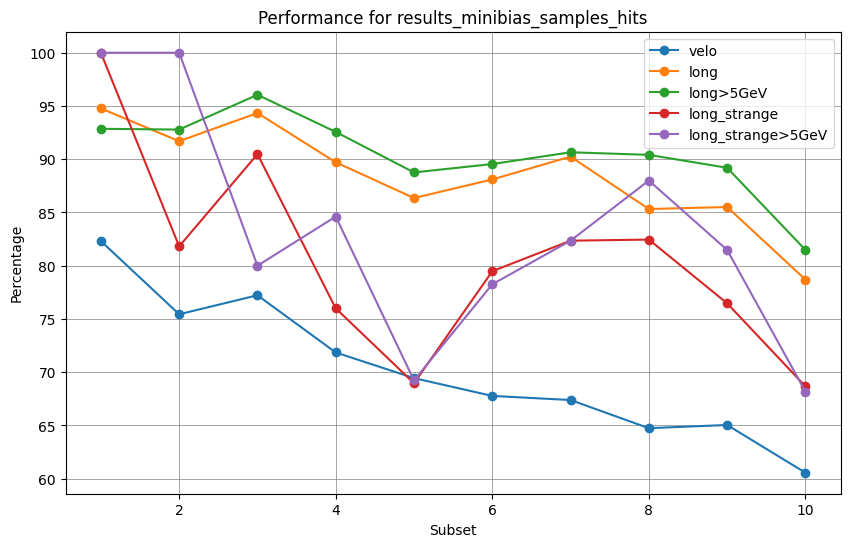

In [19]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits'
dataset = 'minibias'

plot_reconstruction_eff_expriments(exp_name, metrics_names)

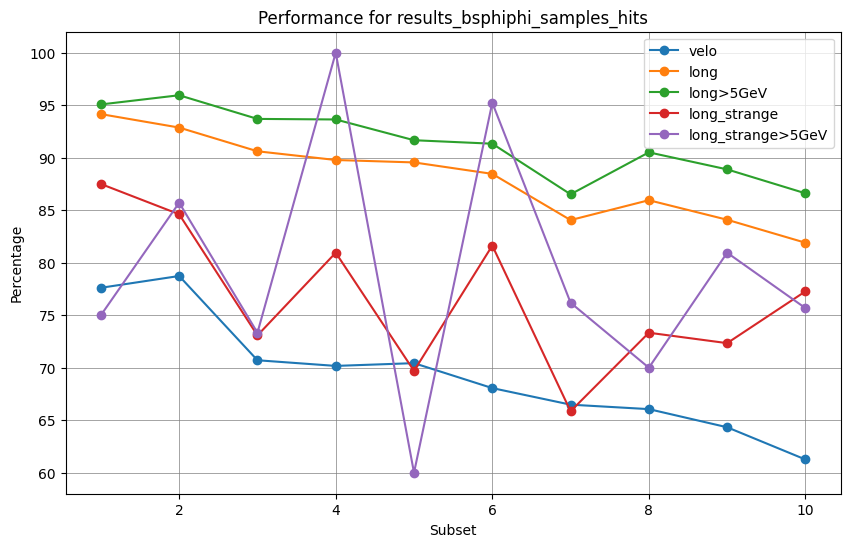

In [20]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_bsphiphi_samples_hits'

plot_reconstruction_eff_expriments(exp_name, metrics_names)

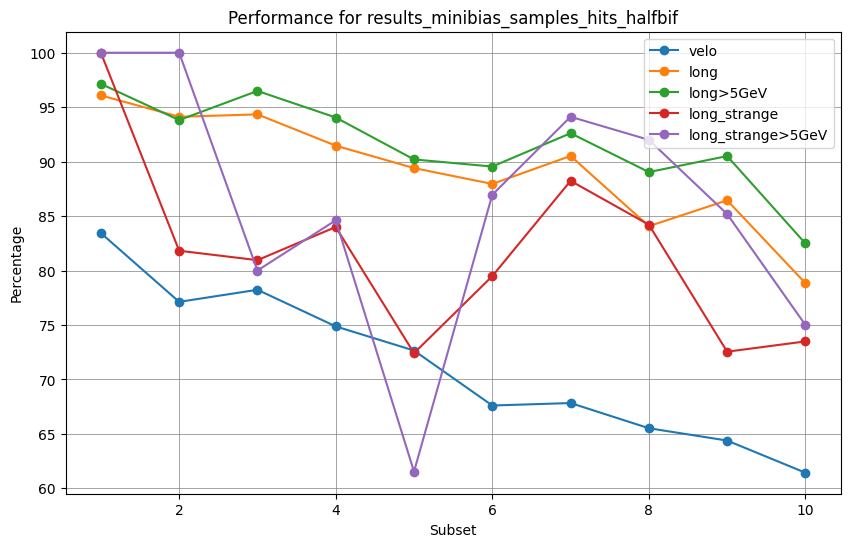

In [21]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits_halfbif'

plot_reconstruction_eff_expriments(exp_name, metrics_names)

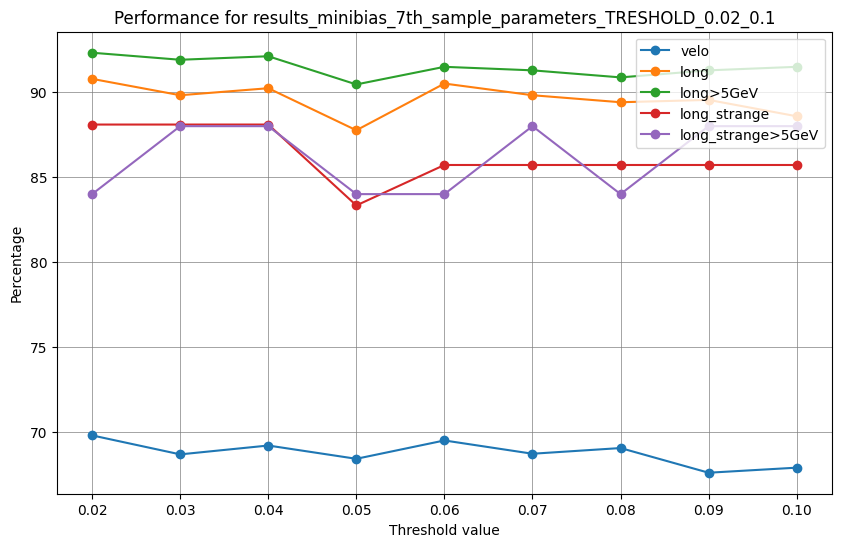

In [22]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_7th_sample_parameters_TRESHOLD_0.02_0.1'
z= np.linspace(0.02, 0.1, 9).round(2).tolist()


plot_reconstruction_eff_expriments(exp_name, metrics_names, x=z, xlabel='Threshold value')

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


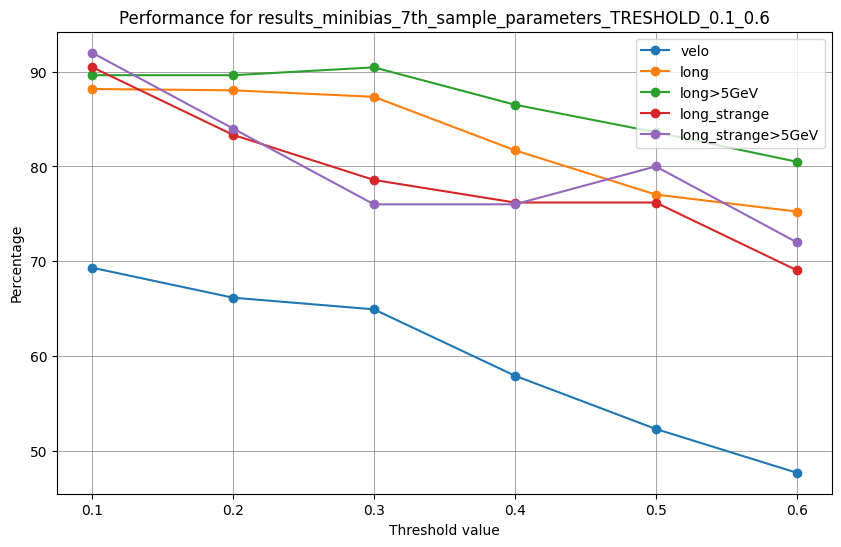

In [23]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_7th_sample_parameters_TRESHOLD_0.1_0.6'
z= np.linspace(0.1, 0.6, 6).round(2).tolist()
print(z)

plot_reconstruction_eff_expriments(exp_name, metrics_names, z, xlabel='Threshold value')

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


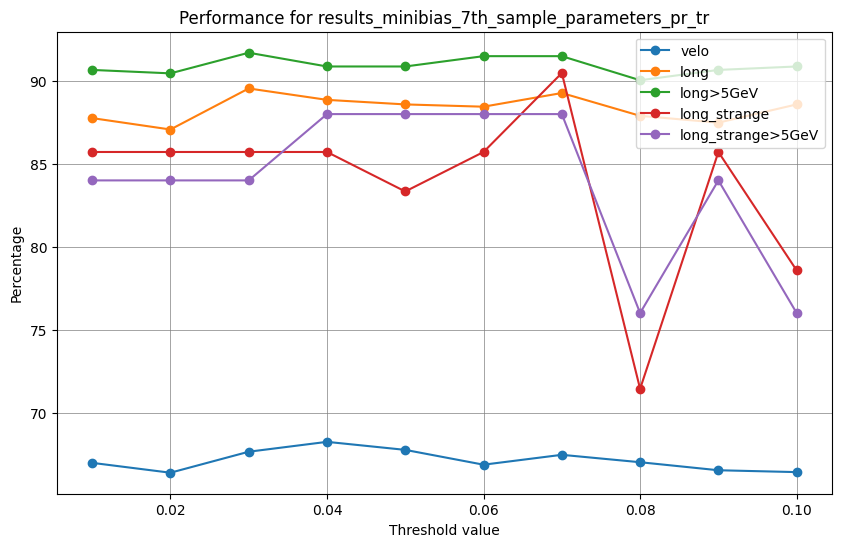

In [24]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_7th_sample_parameters_pr_tr'
z= np.linspace(0.01, 0.1, 10).round(2).tolist()
print(z)

plot_reconstruction_eff_expriments(exp_name, metrics_names, z, xlabel='Threshold value')

### Plot multiple results side by side in different plots

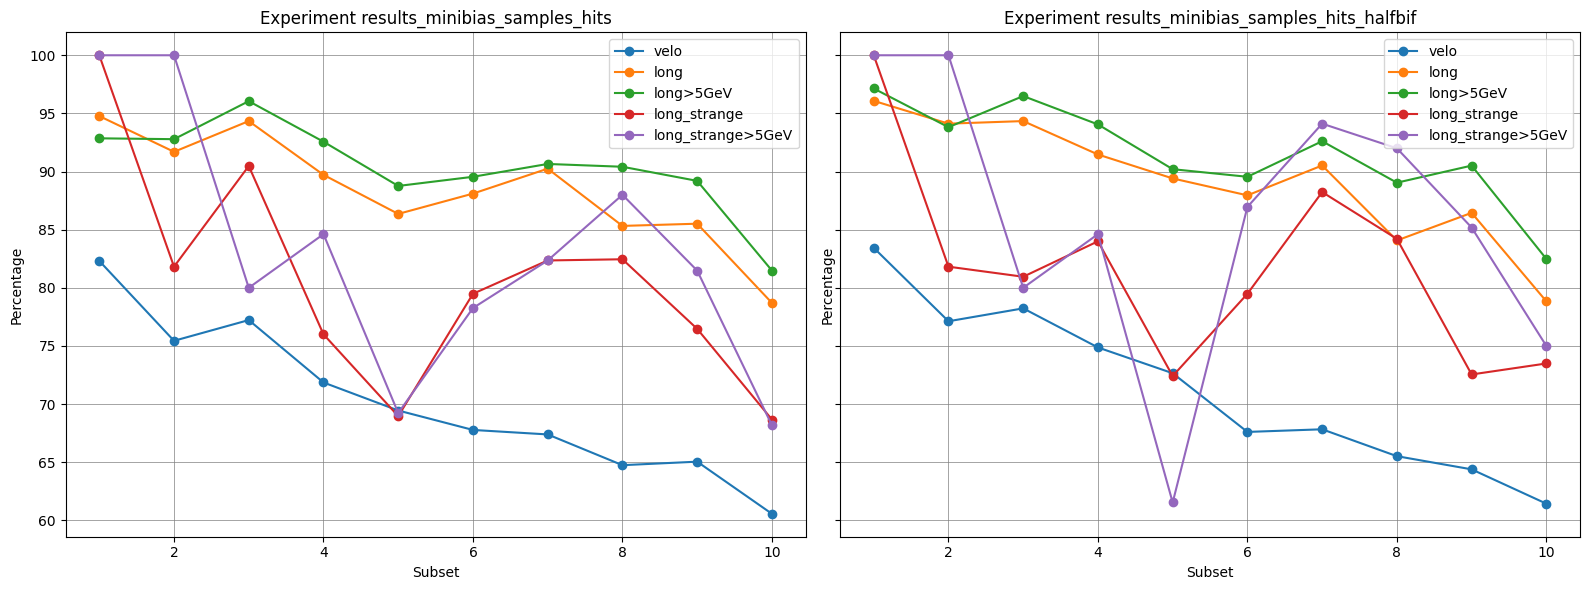

In [26]:
# Define the experiments and metrics to plot
exp1_name = 'results_minibias_samples_hits'
exp2_name = 'results_minibias_samples_hits_halfbif'
metrics_names = ['velo', 'long', 'long>5GeV', 'long_strange', 'long_strange>5GeV']

# Plot the experiments side by side
fig, axs = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

# Plot experiment 1 on the left subplot
ax = axs[0]
plot_reconstruction_eff_expriments(exp1_name, metrics_names, ax=ax)
ax.set_title(f'Experiment {exp1_name}')
ax.grid(True, color='grey', linewidth=0.5)


# Plot experiment 2 on the right subplot
ax = axs[1]
plot_reconstruction_eff_expriments(exp2_name, metrics_names, ax=ax)
ax.set_title(f'Experiment {exp2_name}')

# Adjust the layout
plt.tight_layout()


In [27]:
def plot_reconstruction_eff_experiments_side(exp_names, metrics_names):
    # Define the experiments and metrics to plot
    #for exp_name in exp_names: 
    #    performances_dict[exp_name] = get_recon_eff_experiments(exp_name)

    # Plot the experiments side by side
    fig, axs = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

    # Plot experiment 1 on the left subplot
    for i, exp_name in enumerate(exp_names):

        ax = axs[i]
        plot_reconstruction_eff_expriments(exp_name, metrics_names,ax=ax)
        ax.set_title(f'Experiment {exp_name}')
        ax.grid(True, color='grey', linewidth=0.5)
        plt.tight_layout()


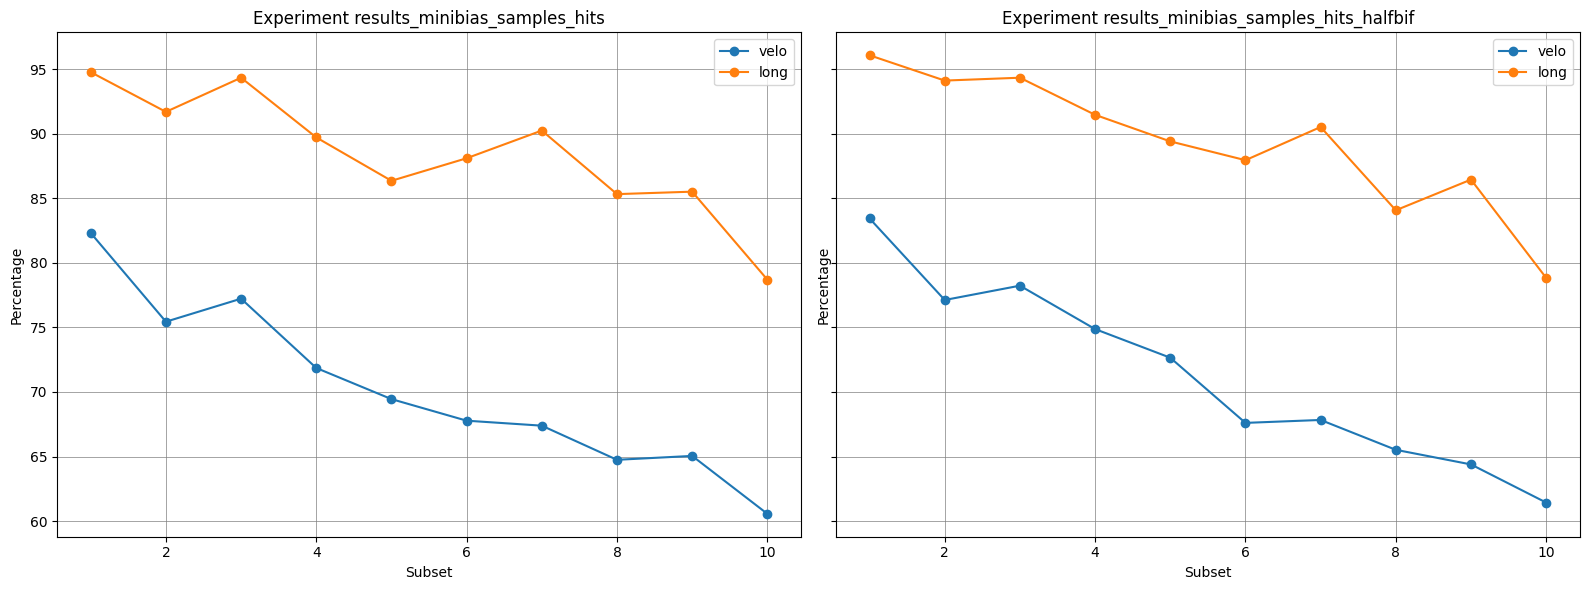

In [28]:
exp_names = ['results_minibias_samples_hits', 'results_minibias_samples_hits_halfbif']
metrics_names = ['velo', 'long']
plot_reconstruction_eff_experiments_side(exp_names, metrics_names)

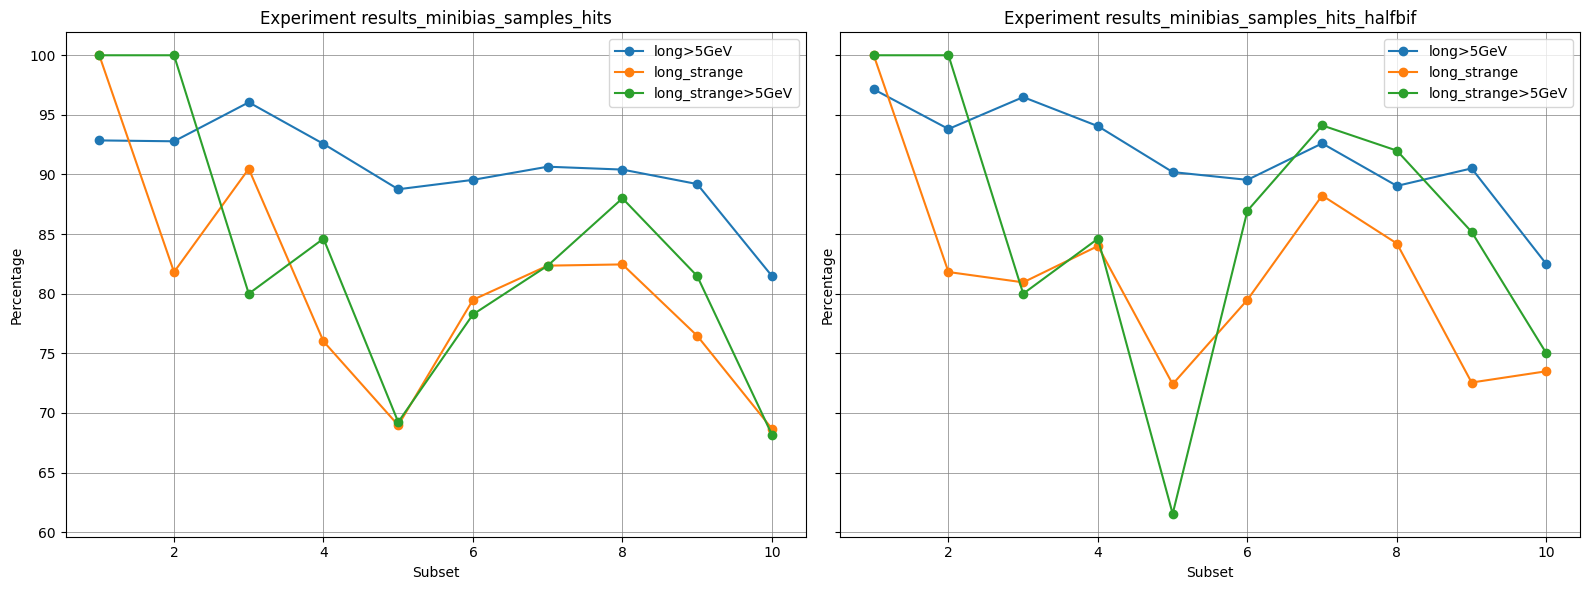

In [29]:
exp_names = ['results_minibias_samples_hits', 'results_minibias_samples_hits_halfbif']
metrics_names = ['long>5GeV', 'long_strange', 'long_strange>5GeV']
plot_reconstruction_eff_experiments_side(exp_names, metrics_names)

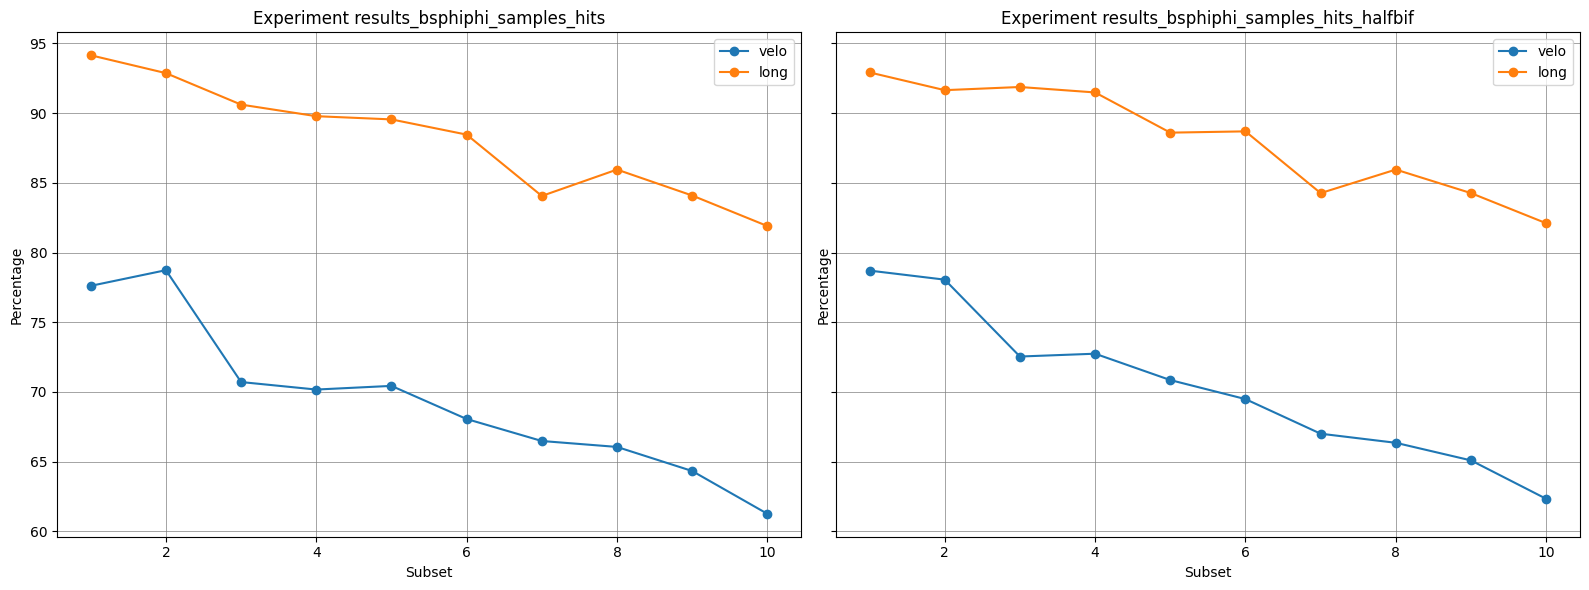

In [30]:
exp_names = ['results_bsphiphi_samples_hits', 'results_bsphiphi_samples_hits_halfbif']
metrics_names = ['velo', 'long']
plot_reconstruction_eff_experiments_side(exp_names, metrics_names)

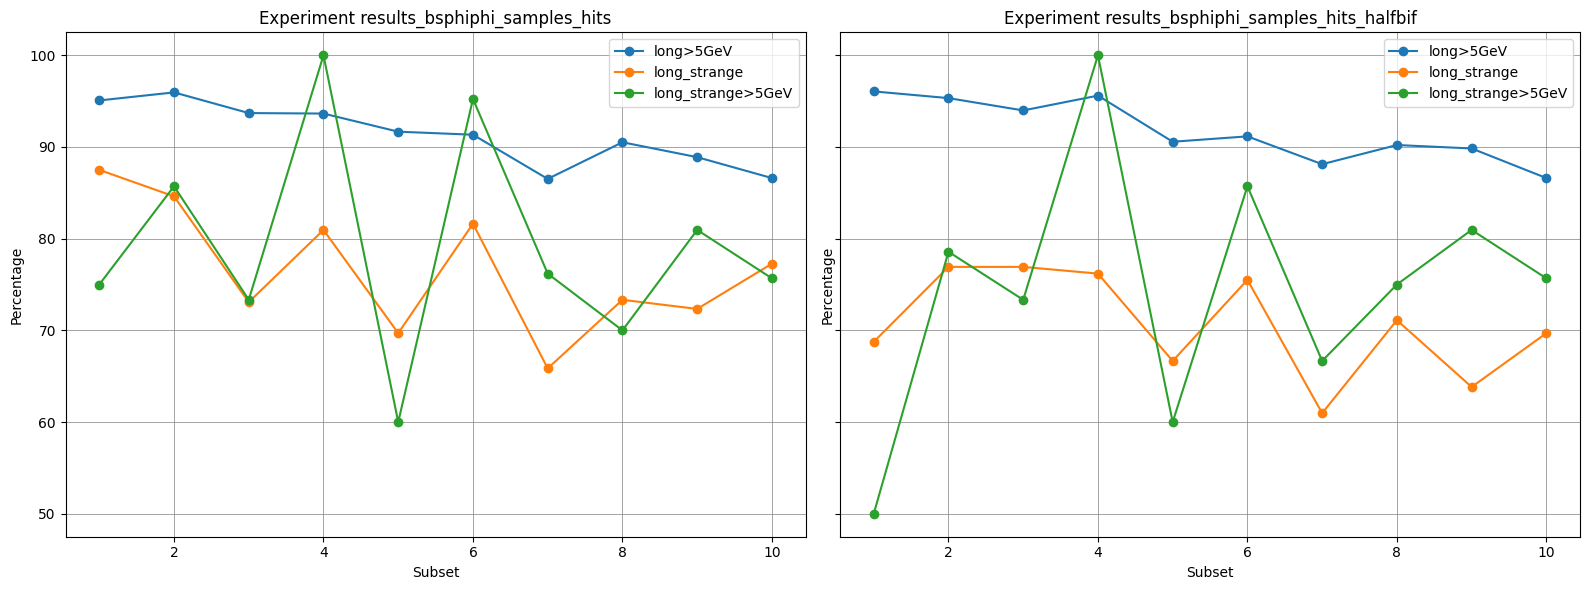

In [31]:
exp_names = ['results_bsphiphi_samples_hits', 'results_bsphiphi_samples_hits_halfbif']
metrics_names = ['long>5GeV', 'long_strange', 'long_strange>5GeV']
plot_reconstruction_eff_experiments_side(exp_names, metrics_names)

### Plot multiple results in the same plot

In [32]:
def plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names):
    # Define the color palette for each experiment
    small_color_palette = ['blue', 'red', 'green', 'orange', 'purple']


    # Get the performances for each experiment
    performances_dict = {}
    for exp_name in exp_names:
        performances_dict[exp_name] = get_recon_eff_experiments(exp_name)

    # Create the x-axis range for each experiment
    x = [range(1, len(performances_dict[exp_name]) + 1) for exp_name in exp_names]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each metric for each experiment
    for i, metric_name in enumerate(metrics_names):
        for j, exp_name in enumerate(exp_names):
            # Extract the list of values for the current metric and experiment
            metric_values = extract_metric_dict(performances_dict[exp_name], metric_name)
            # Plot the metric values against the x-axis for the current experiment
            ax.plot(x[j], metric_values, marker='o', linestyle='-', label=metric_name + ' (' + exp_name + ')',color=small_color_palette[j])

    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    plt.grid(True, color='grey', linewidth=0.5)
    ax.legend(loc='upper right')


In [33]:
def plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names):
    # Get the performances for each experiment
    performances_dict = {}
    for exp_name in exp_names:
        performances_dict[exp_name] = get_recon_eff_experiments(exp_name)

    # Define a color palette for each experiment
    color_palette = {
        palette: ['#0080FF', '#66B2FF', '#B2D8FF', '#E5F2FF', '#FFFFFF'],
        'results_minibias_samples_hits_halfbif': ['#FF0066', '#FF6699', '#FFB2D8', '#FFCCE5', '#FFE5F2'],
        'results_minibias_samples_hits_halfbif_rightleft': ['#00FF00', '#66FF66', '#B2FFB2', '#E5FFE5', '#FFFFFF'],
    }


    # Create the x-axis range for each experiment
    x = [range(1, len(performances_dict[exp_name]) + 1) for exp_name in exp_names]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each metric for each experiment
    for i, metric_name in enumerate(metrics_names):
        for j, exp_name in enumerate(exp_names):
            # Extract the list of values for the current metric and experiment
            metric_values = extract_metric_dict(performances_dict[exp_name], metric_name)
            # Plot the metric values against the x-axis for the current experiment
            ax.plot(x[j], metric_values, marker='o', linestyle='-', label=metric_name + ' (' + exp_name + ')', color=color_palette[exp_name][i])
        
    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    plt.grid(True, color='grey', linewidth=0.5)
    ax.legend(loc='upper right')


In [34]:
import matplotlib.pyplot as plt

# Define the color palettes for each metric
palette1 = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
palette2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
palette3 = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']

def plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names):
    # Get the performances for each experiment
    performances_dict = {}
    for exp_name in exp_names:
        performances_dict[exp_name] = get_recon_eff_experiments(exp_name)

    # Create the x-axis range for each experiment
    x = [range(1, len(performances_dict[exp_name]) + 1) for exp_name in exp_names]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each metric for each experiment
    for i, metric_name in enumerate(metrics_names):
        # Select the appropriate color palette for the metric
        if i % 3 == 0:
            color_palette = palette1
        elif i % 3 == 1:
            color_palette = palette2
        else:
            color_palette = palette3
        for j, exp_name in enumerate(exp_names):
            # Extract the list of values for the current metric and experiment
            metric_values = extract_metric_dict(performances_dict[exp_name], metric_name)
            # Plot the metric values against the x-axis for the current experiment
            ax.plot(x[j], metric_values, marker='o', linestyle='-', label=metric_name + ' (' + exp_name + ')', color=color_palette[i])

    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    plt.grid(True, color='grey', linewidth=0.5)
    ax.legend(loc='upper right')


In [35]:
def plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names):
    # Define the color palette for each experiment
    color_palette_dark = {
        'blue': ['#3498DB', '#5DADE2', '#85C1E9', '#AED6F1', '#D6EAF8'],
        'red': ['#E74C3C', '#EC7063', '#F1948A', '#F5B7B1', '#FADBD8'],
        'green': ['#2ECC71', '#58D68D', '#82E0AA', '#ABEBC6', '#D5F5E3'],
        'orange': ['#EB984E', '#F5B041', '#F8C471', '#FAD7A0', '#FDEBD0'],
        'purple': ['#8E44AD', '#A569BD', '#BB8FCE', '#D2B4DE', '#E8DAEF']
    }

    # Get the performances for each experiment
    performances_dict = {}
    for exp_name in exp_names:
        performances_dict[exp_name] = get_recon_eff_experiments(exp_name)

    # Create the x-axis range for each experiment
    x = [range(1, len(performances_dict[exp_name]) + 1) for exp_name in exp_names]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each metric for each experiment
    for i, metric_name in enumerate(metrics_names):
        for j, exp_name in enumerate(exp_names):
            # Extract the list of values for the current metric and experiment
            metric_values = extract_metric_dict(performances_dict[exp_name], metric_name)
            # Plot the metric values against the x-axis for the current experiment
            ax.plot(x[j], metric_values, marker='o', linestyle='-', label=metric_name + ' (' + exp_name + ')', color=color_palette_dark[list(color_palette_dark.keys())[j]][i])


    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    plt.grid(True, color='grey', linewidth=0.5)
    ax.legend(loc='upper right')


In [39]:

def plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names):
    # Determine the line styles and color palettes based on the number of experiments and metrics
    num_experiments = len(exp_names)
    num_metrics = len(metrics_names)
    line_styles = ['-', '--', '-.']
    #color_palette = plt.cm.get_cmap('tab10', num_metrics)
    color_palette = sns.color_palette("tab10", num_metrics)


    # Get the performances for each experiment
    performances_dict = {}
    for exp_name in exp_names:
        performances_dict[exp_name] = get_recon_eff_experiments(exp_name)

    # Create the x-axis range for each experiment
    x = [range(1, len(performances_dict[exp_name]) + 1) for exp_name in exp_names]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each metric for each experiment
    for i, metric_name in enumerate(metrics_names):
        for j, exp_name in enumerate(exp_names):
            # Extract the list of values for the current metric and experiment
            metric_values = extract_metric_dict(performances_dict[exp_name], metric_name)
            # Plot the metric values against the x-axis for the current experiment
            ax.plot(x[j], metric_values, marker='o', linestyle=line_styles[j % num_experiments], 
                    label=metric_name + ' (' + exp_name + ')', color=color_palette[i])

    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    plt.grid(True, color='grey', linewidth=0.5)
    #ax.legend(loc='upper right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



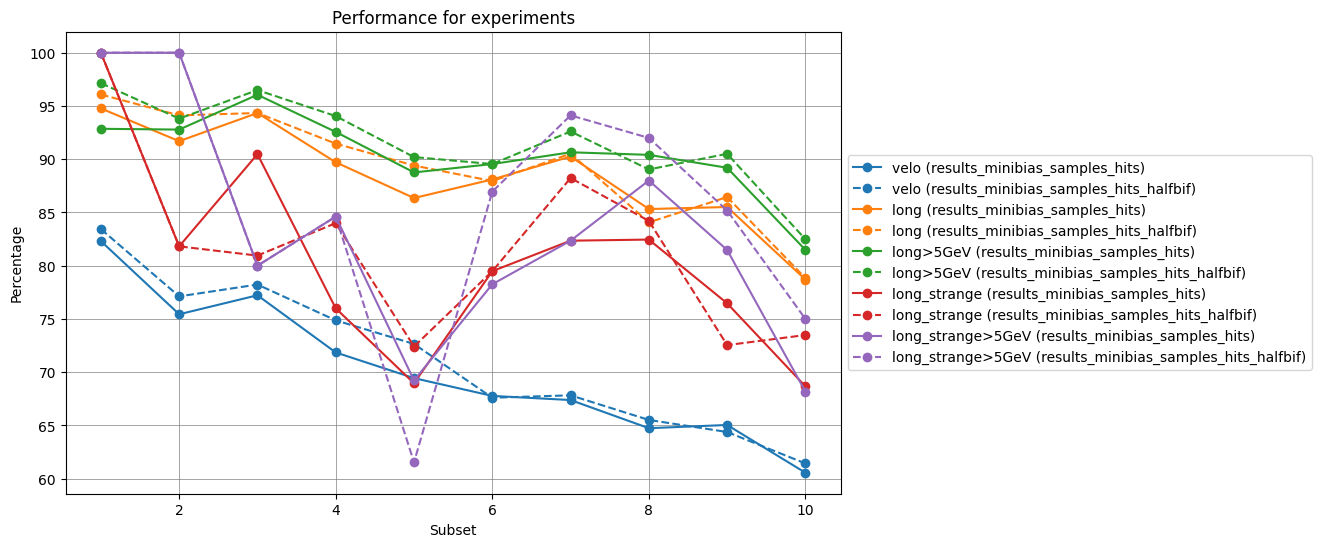

In [40]:
exp_names = ['results_minibias_samples_hits', 'results_minibias_samples_hits_halfbif']
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names)


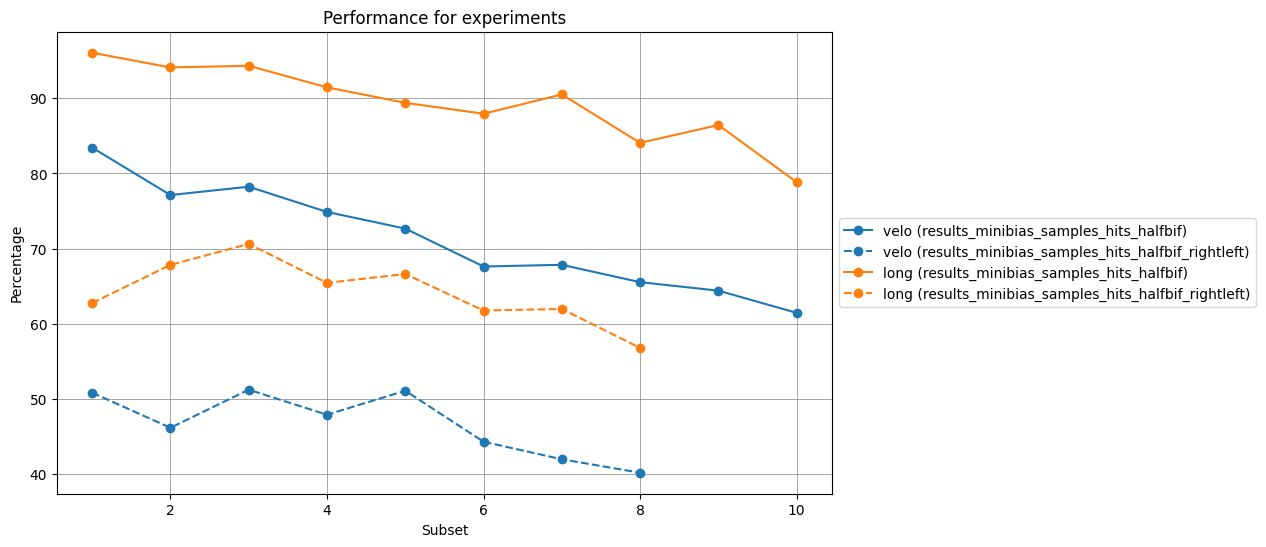

In [41]:
exp_names = ['results_minibias_samples_hits_halfbif', 'results_minibias_samples_hits_halfbif_rightleft']
metrics_names = ['velo', 'long']
plot_reconstruction_eff_experiments_multiple(exp_names, metrics_names)

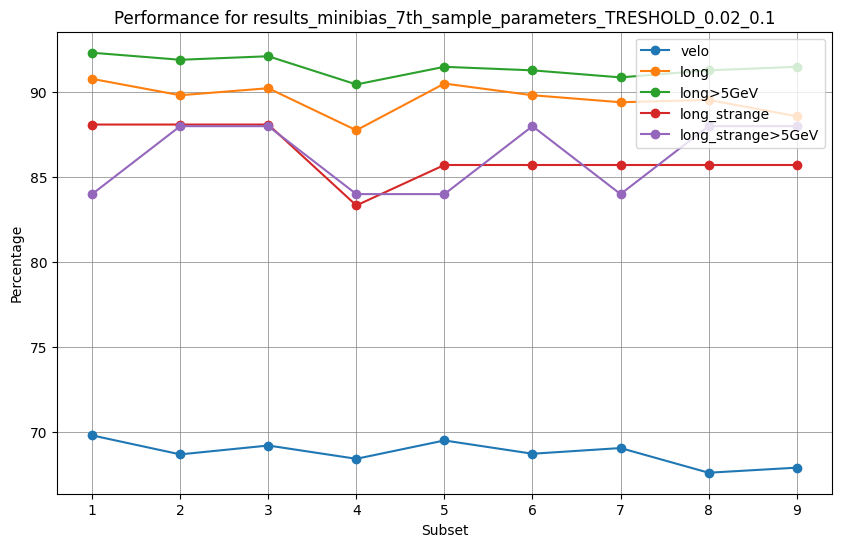

In [43]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_7th_sample_parameters_TRESHOLD_0.02_0.1'
dataset = 'minibias'

plot_reconstruction_eff_expriments(exp_name, metrics_names)

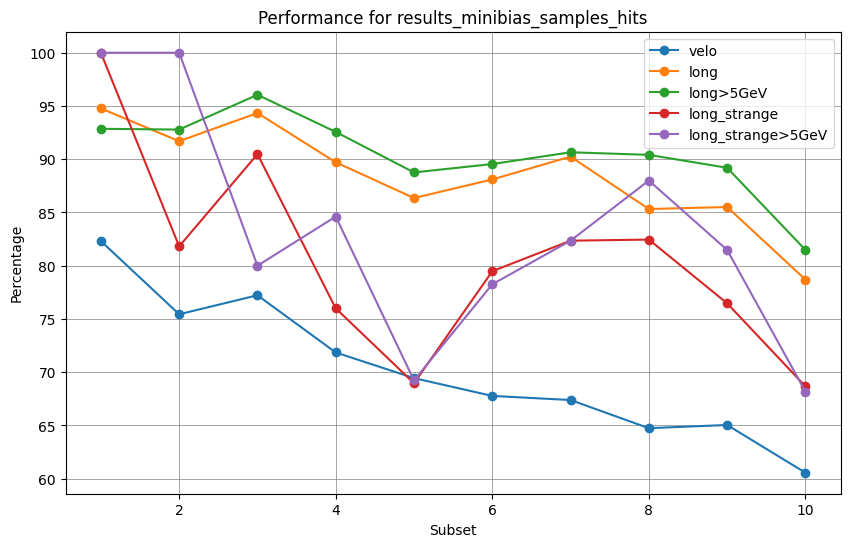

In [45]:
metrics_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits'
dataset = 'minibias'

plot_reconstruction_eff_expriments(exp_name, metrics_names)

## 2. Second try by extracting both percentage given for the reconstruction efficiency

In [46]:
import re

text = "velo : 512 from 622 ( 82.3%, 83.2%)"
pattern = r'velo\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d.]+)%\s*,\s*([\d.]+)%\)'

matches = re.search(pattern, text)

if matches:
    velo_dict = {"velo": f"{matches.group(1)}, {matches.group(2)}"}
    print(velo_dict)

{'velo': '82.3, 83.2'}


In [47]:
import re

text = """619 tracks including       25 ghosts (  4.0%). Event average   4.0%
              velo :      512 from      622 ( 82.3%,  83.2%)       25 clones (  4.88%), purity: ( 99.02%,  99.04%),  hitEff: ( 88.68%,  88.72%)
              long :      145 from      153 ( 94.8%,  94.6%)       18 clones ( 12.41%), purity: ( 99.42%,  99.49%),  hitEff: ( 86.96%,  84.62%)
         long>5GeV :       65 from       70 ( 92.9%,  92.2%)        9 clones ( 13.85%), purity: ( 99.53%,  99.60%),  hitEff: ( 85.49%,  83.81%)
      long_strange :        8 from        8 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: ( 97.50%,  97.50%)
 long_strange>5GeV :        3 from        3 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
____________________"""

# Define regular expression pattern
pattern = r"(\w+)\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d\.]+)%,\s*([\d\.]+)%\)"

# Find all matches in text
matches = re.findall(pattern, text)

# Convert matches to dictionary
dictionary = {match[0]: f"{match[1]}, {match[2]}" for match in matches}

print(dictionary)


{'velo': '82.3, 83.2', 'long': '94.8, 94.6', '5GeV': '100.0, 100.0', 'long_strange': '100.0, 100.0'}


In [96]:
# Get file path
exp_name = 'results_minibias_samples_hits'
file_path = project_root + "/results/" + exp_name + ".txt"

# Read file
with open(file_path, "r") as f:
    file_contents = f.read()

# Define experiments
experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

# Create a dictionary to store the results
performance_dict = {}

# Loop over each experiment in the file
for experiment in experiments:

    title = re.search(r"Experiment.*", experiment).group()
    results = re.search(r"ID of each event.*", experiment, re.DOTALL).group()
    text = results

    # Define regular expressions to extract percentages
    pattern = r"(\w+)\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d\.]+)%,\s*([\d\.]+)%\)"

    matches = re.findall(pattern, text)
    dictionary = {match[0]: f"{match[1]}, {match[2]}" for match in matches}


    # Add the title and metrics to the results dictionary
    performance_dict[title] = dictionary

# Print the results dictionary
print(performance_dict)


{'Experiment Test of the Hopfield network on the 1th sample minibias dataset': {'velo': '82.3, 83.2', 'long': '94.8, 94.6', '5GeV': '100.0, 100.0', 'long_strange': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset': {'velo': '75.4, 77.3', 'long': '91.7, 94.2', '5GeV': '100.0, 100.0', 'long_strange': '81.8, 97.0'}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset': {'velo': '77.2, 78.9', 'long': '94.3, 93.9', '5GeV': '80.0, 61.2', 'long_strange': '90.5, 72.2'}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset': {'velo': '71.9, 72.5', 'long': '89.7, 89.6', '5GeV': '84.6, 88.8', 'long_strange': '76.0, 72.1'}, 'Experiment Test of the Hopfield network on the 5th sample minibias dataset': {'velo': '69.4, 69.9', 'long': '86.4, 84.3', '5GeV': '69.2, 63.8', 'long_strange': '69.0, 65.2'}, 'Experiment Test of the Hopfield network on the 6th sample minibias dataset': {'velo': '67.8, 66.6', 'long': '88.

In [97]:
def get_recon_eff_experiments_2(exp_name):
    # Get file path
    file_path = project_root + "/results/" + exp_name + ".txt"

    # Read file
    with open(file_path, "r") as f:
        file_contents = f.read()

    # Define experiments
    experiments = re.findall(r"Experiment.*?(?=(?:Experiment|$))", file_contents, re.DOTALL)

    # Create a dictionary to store the results
    performance_dict = {}

    # Loop over each experiment in the file
    for experiment in experiments:
        title = re.search(r"Experiment.*", experiment).group()

        #Add a condition if the results is intermediary and so a text is not complete yet
        try:
            text = re.search(r"ID of each event.*", experiment, re.DOTALL).group()
        except AttributeError:
            print(f"Skipping experiment: {title}")
            continue

    # Define regular expressions to extract percentages
        #pattern = r"(\w+)\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d\.]+)%,\s*([\d\.]+)%\)"
        pattern = r"\b(velo|long|long>5GeV|long_strange|long_strange>5GeV)\s*:\s*\d+\s*from\s*\d+\s*\(\s*([\d\.]+)%,\s*([\d\.]+)%\)"
        matches = re.findall(pattern, text)
        dictionary = {match[0]: f"{match[1]}, {match[2]}" for match in matches}


        # Add the title and metrics to the results dictionary
        performance_dict[title] = dictionary

    # Return the results dictionary
    return performance_dict

In [98]:
performance_minibias_hits = get_recon_eff_experiments_2('results_minibias_samples_hits')
print(performance_minibias_hits)

{'Experiment Test of the Hopfield network on the 1th sample minibias dataset': {'velo': '82.3, 83.2', 'long': '94.8, 94.6', 'long>5GeV': '92.9, 92.2', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset': {'velo': '75.4, 77.3', 'long': '91.7, 94.2', 'long>5GeV': '92.8, 94.4', 'long_strange': '81.8, 97.0', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset': {'velo': '77.2, 78.9', 'long': '94.3, 93.9', 'long>5GeV': '96.1, 95.2', 'long_strange': '90.5, 72.2', 'long_strange>5GeV': '80.0, 61.2'}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset': {'velo': '71.9, 72.5', 'long': '89.7, 89.6', 'long>5GeV': '92.6, 94.5', 'long_strange': '76.0, 72.1', 'long_strange>5GeV': '84.6, 88.8'}, 'Experiment Test of the Hopfield network on the 5th sample minibias dataset': {'velo': '69.4, 69.9', 'long': '86.4, 84.3', 'long>

In [99]:
data_dict= performance_minibias_hits
print(data_dict)


{'Experiment Test of the Hopfield network on the 1th sample minibias dataset': {'velo': '82.3, 83.2', 'long': '94.8, 94.6', 'long>5GeV': '92.9, 92.2', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset': {'velo': '75.4, 77.3', 'long': '91.7, 94.2', 'long>5GeV': '92.8, 94.4', 'long_strange': '81.8, 97.0', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset': {'velo': '77.2, 78.9', 'long': '94.3, 93.9', 'long>5GeV': '96.1, 95.2', 'long_strange': '90.5, 72.2', 'long_strange>5GeV': '80.0, 61.2'}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset': {'velo': '71.9, 72.5', 'long': '89.7, 89.6', 'long>5GeV': '92.6, 94.5', 'long_strange': '76.0, 72.1', 'long_strange>5GeV': '84.6, 88.8'}, 'Experiment Test of the Hopfield network on the 5th sample minibias dataset': {'velo': '69.4, 69.9', 'long': '86.4, 84.3', 'long>

In [100]:
def extract_metrics_values(data_dict, value_idx):
    extracted = {}
    for experiment, metrics in data_dict.items():
        for metric, value in metrics.items():
            if metric not in extracted:
                extracted[metric] = []
            extracted[metric].append(float(value.split(', ')[value_idx]))
    return extracted

values_1 = extract_metrics_values(performance_minibias_hits, 0)
print(values_1)


{'velo': [82.3, 75.4, 77.2, 71.9, 69.4, 67.8, 67.4, 64.7, 65.0, 60.6], 'long': [94.8, 91.7, 94.3, 89.7, 86.4, 88.1, 90.2, 85.3, 85.5, 78.7], 'long>5GeV': [92.9, 92.8, 96.1, 92.6, 88.8, 89.5, 90.7, 90.4, 89.2, 81.5], 'long_strange': [100.0, 81.8, 90.5, 76.0, 69.0, 79.5, 82.4, 82.5, 76.5, 68.7], 'long_strange>5GeV': [100.0, 100.0, 80.0, 84.6, 69.2, 78.3, 82.4, 88.0, 81.5, 68.2]}


In [101]:
#def extract_metric_values(data_dict, value_index):
#    metrics = list(data_dict.values())[0].keys()
#    result_dict = {}
#    for metric in metrics:
#        metric_values = []
#        for exp in data_dict.values():
#            values_str = exp[metric].split(',')
#            if value_index == 1:
#                metric_values.append(float(values_str[0].strip()))
#            elif value_index == 2:
#                metric_values.append(float(values_str[1].strip()))
#        result_dict[metric] = metric_values
#    return result_dict

#values_1 = extract_metric_values(performance_minibias_hits, 1)
#values_2 = extract_metric_values(performance_minibias_hits, 2)


### Plot one results file

In [102]:
def plot_experiments_performance(exp_name, metric_names, value_index=1, x=None ,ax=None, xlabel='Subset'):
    #Get the performance
    exp_performance_dict = get_recon_eff_experiments_2(exp_name)
    metric_values_dict = extract_metrics_values(exp_performance_dict,value_index)

    # Plot 
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6), sharex=True)
    
    #X
    if x is None:
        x = range(1,len(exp_performance_dict)+1,1)
    else:
        x = x


    # Plot each metric
    for metric in metric_names:
        ax.plot(x,metric_values_dict[metric], marker='o', linestyle='-', label=metric)

    # Set the title and labels
    ax.set_title(f'Performance for {exp_name}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.grid(True, color='grey', linewidth=0.5, alpha=0.5)
    ax.set_xticks(range(1, len(exp_performance_dict)+1))
    ax.legend()

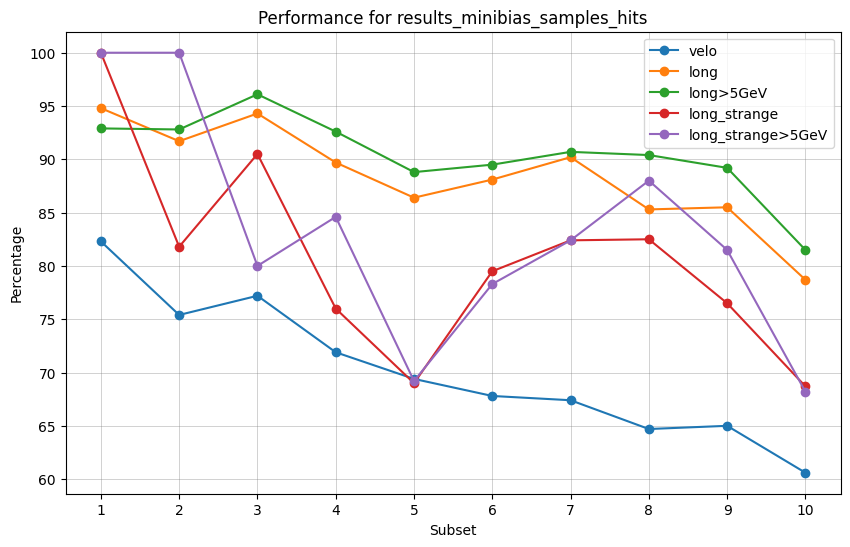

In [103]:
metric_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits'
plot_experiments_performance(exp_name, metric_names, value_index=0, x=None)

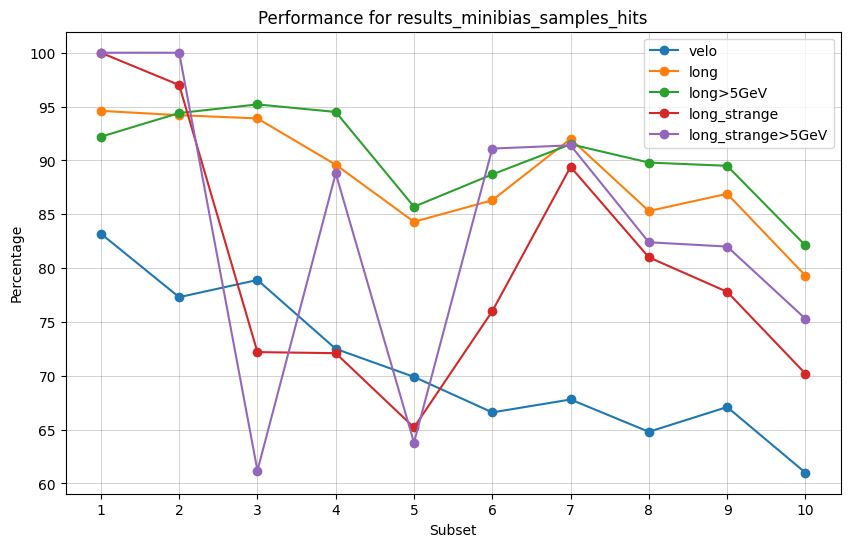

In [104]:
plot_experiments_performance(exp_name, metric_names, value_index=1, x=None)

### Plot several results files side-to-side

In [105]:
def compare_same_experiment_performance_side(exp_name, metric_names, idx_values_list= [0,1]):
    # Plot the experiments side by side
    fig, axs = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

    # Plot experiment 1 on the left subplot
    for i, value_index in enumerate(idx_values_list):
        ax = axs[i]
        plot_experiments_performance(exp_name, metric_names, value_index=value_index, x=None ,ax=ax)
        ax.set_title(f'Experiment {exp_name} - {value_index}')
    
    plt.show()


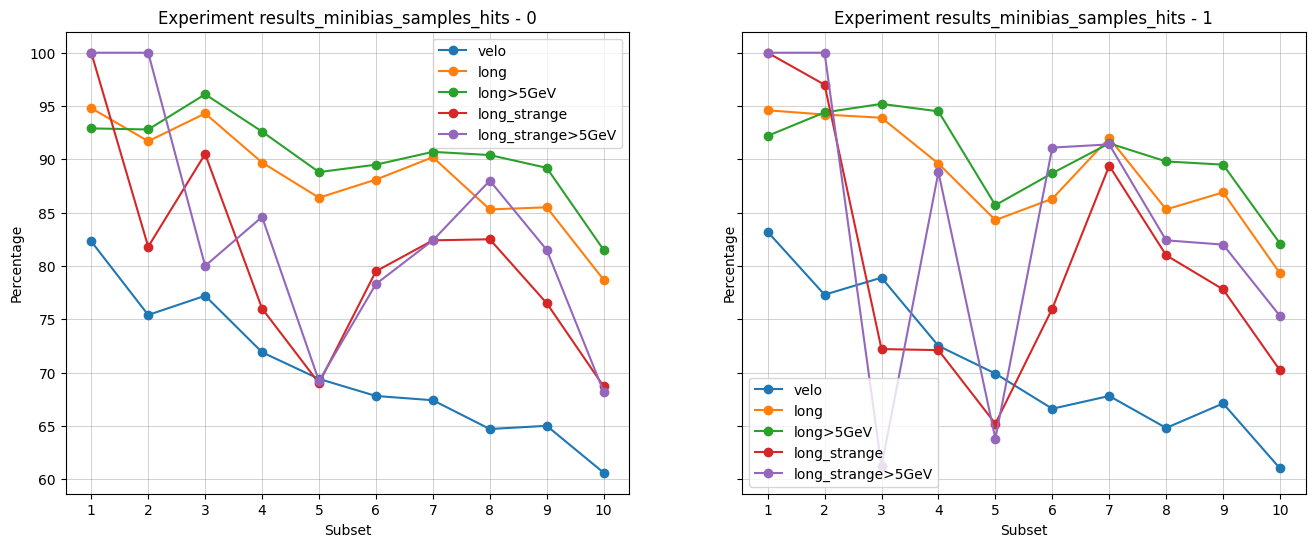

In [106]:
metric_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits'
compare_same_experiment_performance_side(exp_name, metric_names)


### Plot several results files together

In [107]:
def plot_reconstruction_eff_experiments_multiple(exp_name, metrics_names, idx_values_list= [0,1]):
    # Determine the line styles and color palettes based on the number of experiments and metrics
    num_experiments = len(idx_values_list)
    num_metrics = len(metrics_names)
    line_styles = ['-', '--', '-.']
    color_palette = plt.cm.get_cmap('tab10', num_metrics)

    # Get the performances for each experiment
    performance_dict = get_recon_eff_experiments_2(exp_name)

    # Create the x-axis range for each experiment
    x = [range(1, len(performance_dict) + 1)]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    

    # Plot each metric for each experiment
    for i, metric_name in enumerate(metrics_names):
        for j, idx_value in enumerate(idx_values_list):
            # Extract the list of values for the current metric and experiment
            metric_values_dict = extract_metrics_values(performance_dict, idx_value)
            
            # Plot the metric values against the x-axis for the current experiment
            #ax.plot(x, metric_values_dict, marker='o', linestyle=line_styles[j % num_experiments],
            # label=metric_name + ' (' + exp_name + ')', color=color_palette(i))
            ax.plot(x, list(metric_values_dict.values()), marker='o', linestyle=line_styles[j % num_experiments], 
                    label=metric_name + ' (' + exp_name + ')', color=color_palette(i))


    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    plt.grid(True, color='grey', linewidth=0.5)
    #ax.legend(loc='upper right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


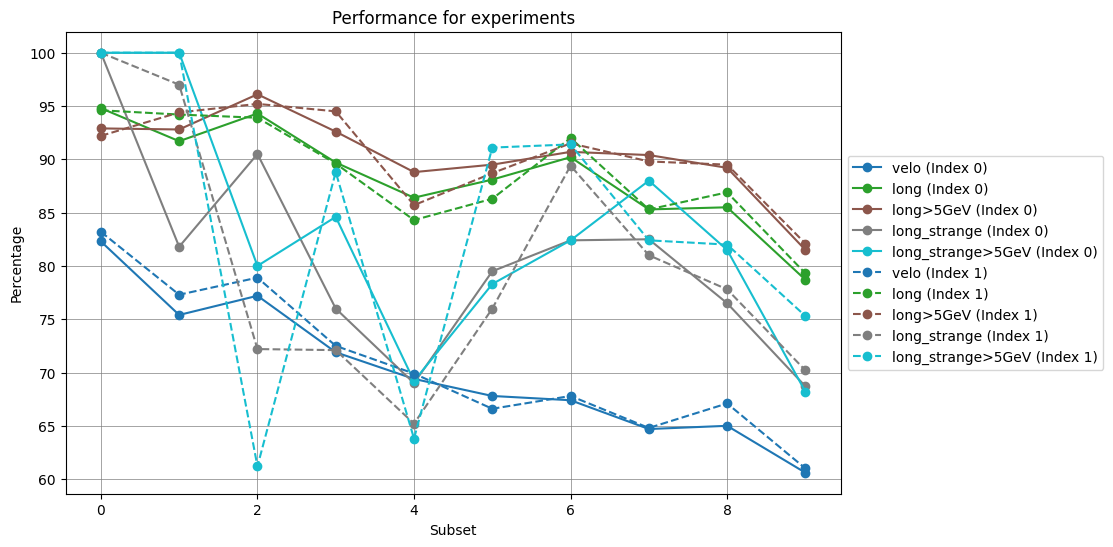

In [108]:
metric_names = ['velo', 'long','long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits'
idx_values_list= [0,1]

num_experiments = len(idx_values_list)
num_metrics = len(metrics_names)
line_styles = ['-', '--', '-.']
color_palette = plt.cm.get_cmap('tab10', num_metrics)

# Get the performances for each experiment
performance_dict = get_recon_eff_experiments_2(exp_name)
#print(performance_dict)
    # Create the x-axis range for each experiment
x = [range(1, len(performance_dict) + 1)]

    # Plot
fig, ax = plt.subplots(figsize=(10, 6))


    # Plot each metric for each experiment
for j, idx_value in enumerate(idx_values_list):
        metric_values_dict = extract_metrics_values(performance_dict, idx_value)

        for i, metric in enumerate(metric_names):
                ax.plot(metric_values_dict[metric], marker='o', linestyle=line_styles[j % num_experiments],
                label=metric + ' (' + 'Index ' + str(idx_value) + ')', color=color_palette(i))

ax.set_xlabel('Subset')
ax.set_ylabel('Percentage')
ax.set_title('Performance for experiments')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticks(range(1, len(performance_dict)+1))
plt.grid(True, color='grey', linewidth=0.5)
plt.show()

In [109]:
def compare_same_experiment_performance_one(exp_name, metrics_names, idx_values_list= [0,1]):

    num_experiments = len(idx_values_list)
    num_metrics = len(metrics_names)
    line_styles = ['-', '--', '-.']
    color_palette = plt.cm.get_cmap('tab10', num_metrics)


    # Get the performances for each experiment
    performance_dict = get_recon_eff_experiments_2(exp_name)

    # Create the x-axis range for each experiment
    x = [range(1, len(performance_dict) + 1)]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))


    # Plot each metric for each experiment
    for j, idx_value in enumerate(idx_values_list):
            metric_values_dict = extract_metrics_values(performance_dict, idx_value)
            for i, metric in enumerate(metric_names):
                    ax.plot(metric_values_dict[metric], marker='o', linestyle=line_styles[j % num_experiments],
                    label=metric + ' (' + 'Index ' + str(idx_value) + ')', color=color_palette(i))

    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title('Performance for experiments')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.set_xticks(range(1, len(performance_dict)+1))
    plt.grid(True, color='grey', linewidth=0.5)
    plt.show()

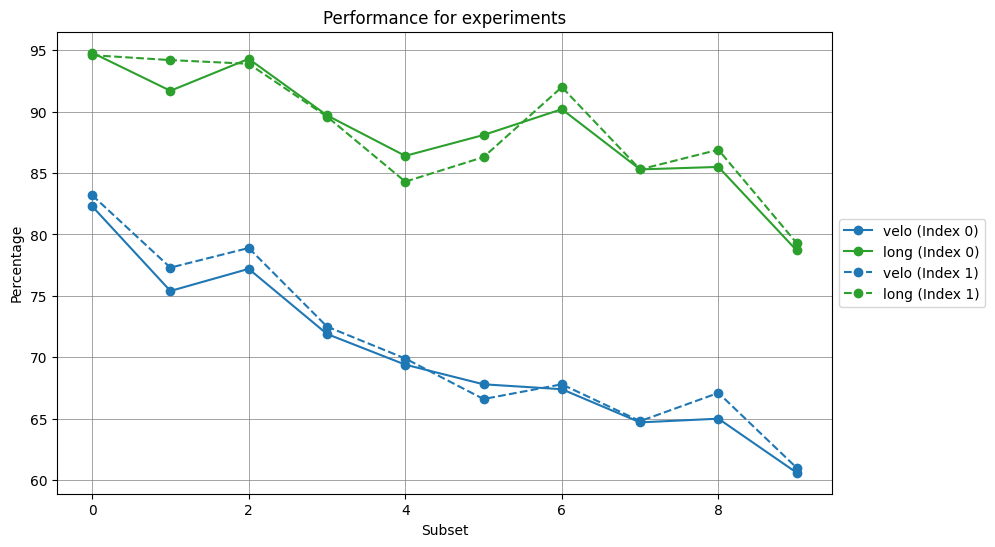

In [110]:
metric_names = ['velo', 'long']
exp_name = 'results_minibias_samples_hits'
compare_same_experiment_performance_one(exp_name, metrics_names)

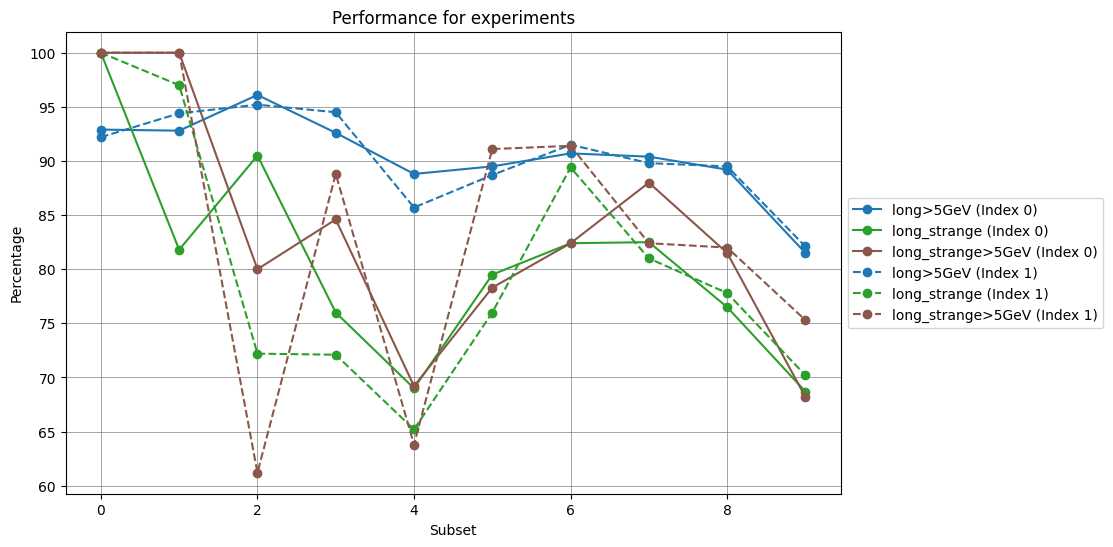

In [111]:
metric_names = ['long>5GeV', 'long_strange', 'long_strange>5GeV']
exp_name = 'results_minibias_samples_hits'
compare_same_experiment_performance_one(exp_name, metrics_names)

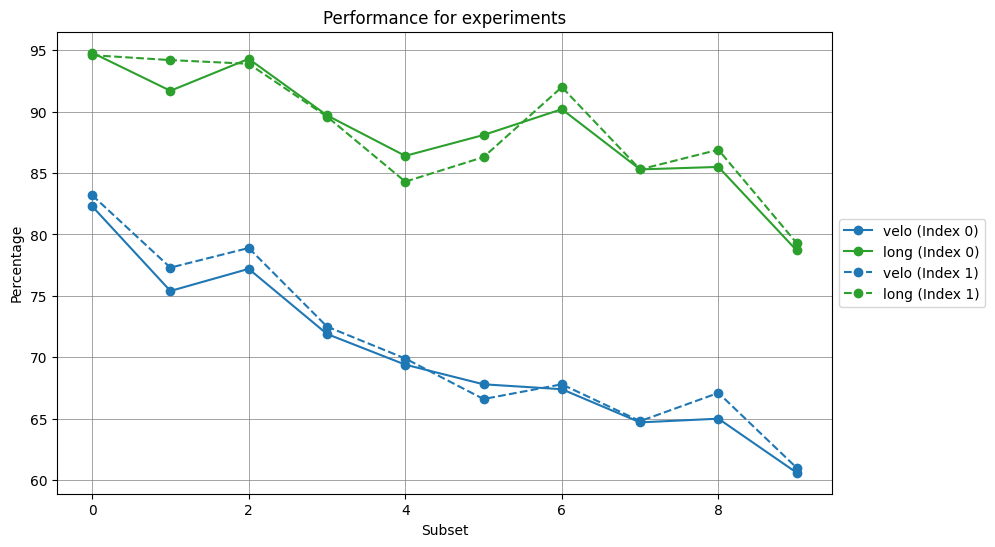

In [112]:
metric_names = ['velo', 'long']
exp_name = 'results_minibias_samples_hits'
compare_same_experiment_performance_one(exp_name, metrics_names)

Plot two different experiments but taking into account both performance value for each metric

In [139]:
def plot_reconstruction_eff_experiments_multiple_2(exp_names, metrics_names, idx_metrix = 1):
    # Determine the line styles and color palettes based on the number of experiments and metrics
    num_experiments = len(exp_names)
    num_metrics = len(metrics_names)
    line_styles = ['-', '--', '-.']
    #color_palette = plt.cm.get_cmap('tab10', num_metrics)
    color_palette = sns.color_palette("tab10", num_metrics)


    # Get the performances for each experiment
    performances_dict = {}
    for exp_name in exp_names:
        performances_dict[exp_name] = get_recon_eff_experiments_2(exp_name)
        print(performances_dict[exp_name])

    # Create the x-axis range for each experiment
    x = [range(1, len(performances_dict[exp_name]) + 1) for exp_name in exp_names]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each metric for each experiment
    for j, exp_name in enumerate(exp_names):
        metric_values_dict = extract_metrics_values(performances_dict[exp_name], idx_metrix)
        for i, metric in enumerate(metric_names):
            ax.plot(metric_values_dict[metric], marker='o', linestyle=line_styles[j % num_experiments],
                    label=metric + ' (' + 'Index ' + str(idx_value) + ')', color=color_palette[i])



    # Add labels and legend
    ax.set_xlabel('Subset')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Performance of experiments: {exp_names}')
    plt.grid(True, color='grey', linewidth=0.5)
    #ax.legend(loc='upper right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


{'Experiment Test of the Hopfield network on the 1th sample minibias dataset with half bifurcation fct': {'velo': '83.4, 86.1', 'long': '96.1, 96.2', 'long>5GeV': '97.1, 96.3', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the 2th sample minibias dataset with half bifurcation fct': {'velo': '77.1, 78.9', 'long': '94.1, 94.9', 'long>5GeV': '93.8, 94.4', 'long_strange': '81.8, 97.0', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the 3th sample minibias dataset with half bifurcation fct': {'velo': '78.2, 80.9', 'long': '94.3, 96.3', 'long>5GeV': '96.5, 97.7', 'long_strange': '81.0, 84.4', 'long_strange>5GeV': '80.0, 88.0'}, 'Experiment Test of the Hopfield network on the 4th sample minibias dataset with half bifurcation fct': {'velo': '74.9, 76.2', 'long': '91.5, 91.5', 'long>5GeV': '94.1, 95.8', 'long_strange': '84.0, 82.1', 'long_strange>5GeV': '84.6, 88.8'}, 'Experiment Test of the H

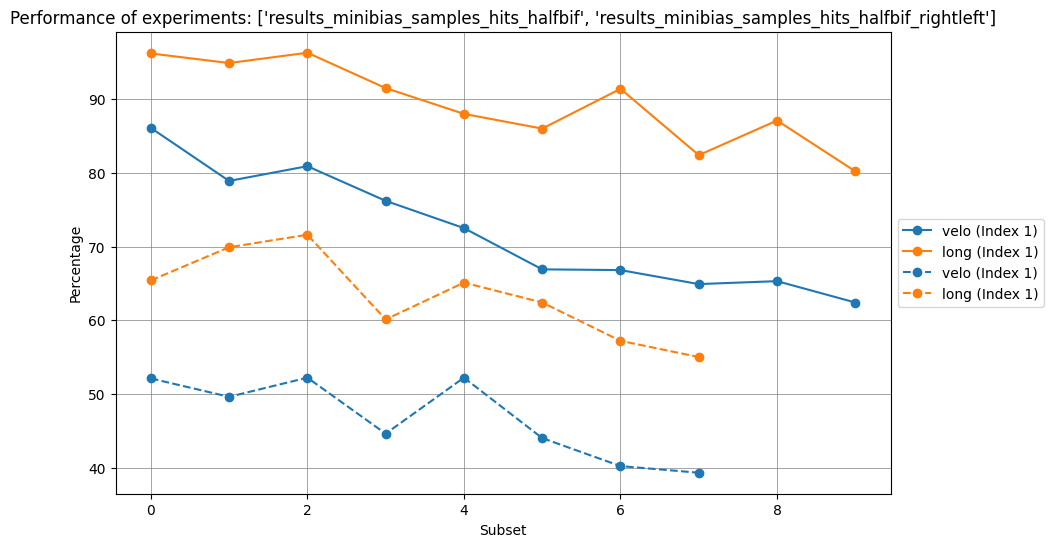

In [140]:
metrics_names = ['velo', 'long']
exp_names = ['results_minibias_samples_hits_halfbif', 'results_minibias_samples_hits_halfbif_rightleft']
plot_reconstruction_eff_experiments_multiple_2(exp_names, metrics_names, 1)


{'Experiment Test of the Hopfield network on the minibias dataset with the LEFT-RIGHT BIFURCATION, decile event 1': {'velo': '100.0, 100.0', 'long': '100.0, 100.0', 'long>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the minibias dataset with the LEFT-RIGHT BIFURCATION, decile event 2': {'velo': '90.7, 90.7', 'long': '100.0, 100.0', 'long>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the minibias dataset with the LEFT-RIGHT BIFURCATION, decile event 3': {'velo': '80.8, 80.8', 'long': '87.8, 87.8', 'long>5GeV': '89.7, 89.7', 'long_strange': '66.7, 66.7', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the minibias dataset with the LEFT-RIGHT BIFURCATION, decile event 4': {'velo': '71.1, 71.1', 'long': '82.6, 82.6', 'long>5GeV': '86.2, 86.2', 'long_strange': '100.0, 100.0', 'long_strange>5GeV': '100.0, 100.0'}, 'Experiment Test of the Hopfield network on the minibias dataset with the LEFT-RIGHT BIFURCATION, dec

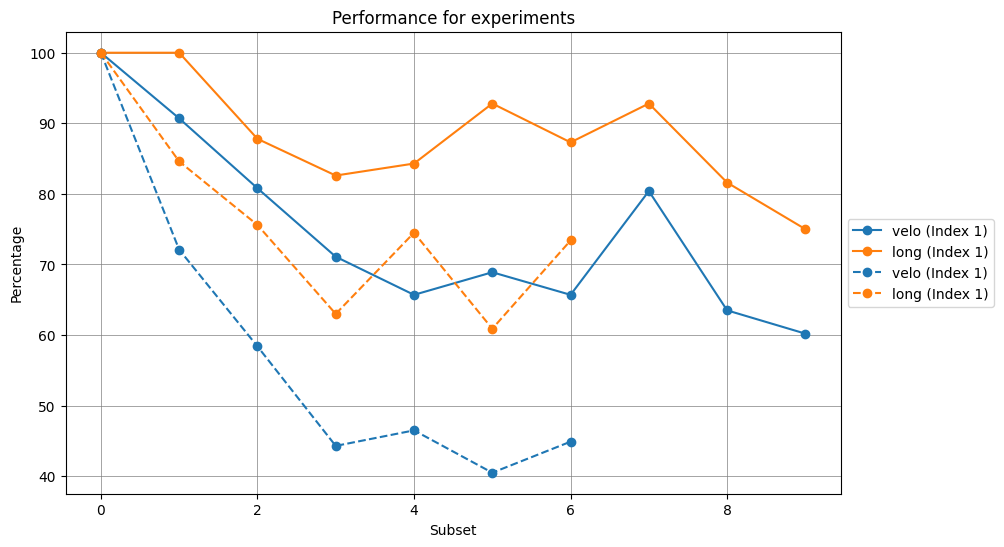

In [138]:
metrics_names = ['velo', 'long']
exp_names = ['results_half_bifurcation_minibias_deciles', 'results_half_bifurcation_minibias_deciles_minimum']
plot_reconstruction_eff_experiments_multiple_2(exp_names, metrics_names, 1)